## Data Cleaning - Remove outliers and drop the unwanted columns
### 1. Basic data checking


In [79]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.7/bin/python3'

In [80]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt


from pymongo import MongoClient
import pandas as pd

client = MongoClient()
db = client.POLICE_DATABASE
db_collection = db.POLICE_INTERVIEWS

data = db_collection.find()
df = pd.DataFrame.from_records(data)
data.info(verbose=True)

In [81]:
df = pd.read_csv('Stop_and_Search__Field_Interviews_.csv', sep=',', low_memory=False )

In [82]:
print(df.shape)

df.head(3)

(593893, 29)


,FieldInterviewID,NOPD_Item,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,VehicleYear,VehicleMake,...,SubjectWeight,SubjectEyeColor,SubjectHairColor,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,17415,NaN,01/01/2010 01:11:00 AM,6,E,6th District,TRAFFIC VIOLATION,NaN,2005.0,DODGE,...,160.0,Brown,Black,LA,01/01/2010 01:26:26 AM,NaN,0.0,0.0,NaN,NaN
1,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,140.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
2,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,145.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN


### 2. Remove all leading and trailing

In [83]:
df.columns = df.columns.str.strip()

### 3. Check if there are duplicates. If so, remove them.¶

In [84]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 4. Check descriptive statistics to find abnormalities (outliers)

In [85]:
print(df.columns)

Index(['FieldInterviewID', 'NOPD_Item', 'EventDate', 'District', 'Zone',
       'OfficerAssignment', 'StopDescription', 'ActionsTaken', 'VehicleYear',
       'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor',
       'SubjectID', 'SubjectRace', 'SubjectGender', 'SubjectAge',
       'SubjectHasPhotoID', 'SubjectHeight', 'SubjectWeight',
       'SubjectEyeColor', 'SubjectHairColor', 'SubjectDriverLicState',
       'CreatedDateTime', 'LastModifiedDateTime', 'Longitude', 'Latitude',
       'Zip', 'BlockAddress'],
      dtype='object')


In [86]:
df[['SubjectAge','SubjectHeight','SubjectWeight']].describe()

,SubjectAge,SubjectHeight,SubjectWeight
count,576132.000000,576096.000000,576204.000000
mean,34.564228,68.723647,170.205668
std,13.354613,70.615748,75.370931
min,0.000000,0.000000,-320.000000
25%,24.000000,66.000000,142.000000
50%,31.000000,68.000000,165.000000
75%,44.000000,71.000000,190.000000
max,119.000000,10932.000000,9999.000000


### Check Age anomalies

In [87]:
df['SubjectAge'].value_counts()

25.0     21618
24.0     21380
23.0     21135
26.0     21015
22.0     20620
         ...  
111.0        1
102.0        1
98.0         1
119.0        1
106.0        1
Name: SubjectAge, Length: 118, dtype: int64

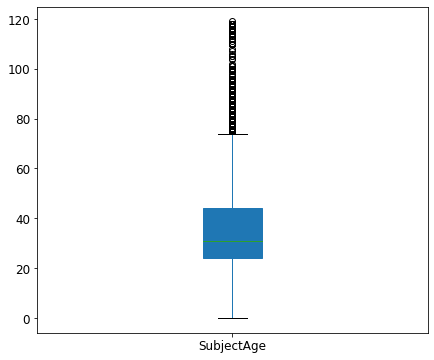

In [88]:
df[['SubjectAge']].boxplot(grid=False,  fontsize=12,figsize=(7, 6),patch_artist = True)


### Checking SubjectHeight and SubjectWeight anomalies

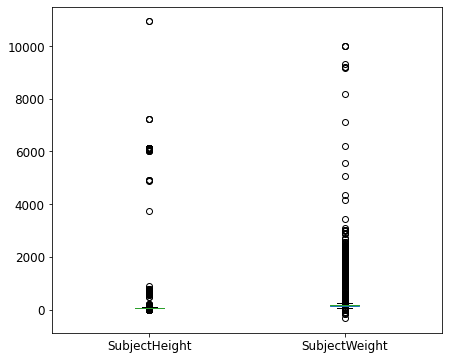

In [89]:
df[['SubjectHeight','SubjectWeight']].boxplot(grid=False,  fontsize=12,figsize=(7, 6),patch_artist = True)

### Get outliers with Age outside range of 15-90 year-old. Height outside range of 4-7 foot tall. Weight outside range of 3-500 lbs

In [90]:
### Age
lower = 15
upper = 90
temp = df.loc[:,'SubjectAge']
outliers_age = [x for x in temp if x < lower or x > upper]
print('Age Lower:{} Upper:{}  Outliers count:{}'.format(lower,  upper, len(outliers_age)))

### Height
lower = 4 * 12
upper = 7 * 12
temp = df.loc[:,'SubjectHeight']
outliers_height = [x for x in temp if x < lower or x > upper]
print('Height Lower:{} Upper:{}  Outliers count:{}'.format(lower,  upper, len(outliers_height)))

### Weight
lower = 3
upper = 500
temp = df.loc[:,'SubjectWeight']
outliers_weight = [x for x in temp if x < lower or x > upper]
print('Weight Lower:{} Upper:{}  Outliers count:{}'.format(lower,  upper, len(outliers_weight)))


Age Lower:15 Upper:90  Outliers count:5265
Height Lower:48 Upper:84  Outliers count:5360
Weight Lower:3 Upper:500  Outliers count:5997


### Remove outliers with Age outside range of 15-90 year-old. Height outside range of 4-7 foot tall. Weight outside range of 3-500 lbs

In [91]:
origin_count = len(df)
print('Original rows count {}'.format(origin_count))

## Age
lower = 15
upper = 90
temp = df.loc[:,'SubjectAge']
outliers_age = [x for x in temp if x < lower or x > upper]
print('Found outliers_age count {}'.format(len(outliers_age)))
# get rows
outliers_age_rows = df[df['SubjectAge'].isin(outliers_age)]
df.drop(outliers_age_rows.index, inplace=True)
print('\tAfter droppred outliers_age {}'.format(len(df)))

## Height
lower = 4 * 12
upper = 7 * 12
temp = df.loc[:,'SubjectHeight']
outliers_height = [x for x in temp if x < lower or x > upper]
print('Found outliers_height count {}'.format(len(outliers_height)))
# get rows
outliers_height_rows = df[df['SubjectHeight'].isin(outliers_height)]
df.drop(outliers_height_rows.index, inplace=True)
print('\tAfter droppred outliers_Height {}'.format(len(df)))

## Weight
lower = 3
upper = 500
temp = df.loc[:,'SubjectWeight']
outliers_weight = [x for x in temp if x < lower or x > upper]
print('Found outliers_weight count {}'.format(len(outliers_weight)))
# get rows
outliers_weight_rows = df[df['SubjectWeight'].isin(outliers_weight)]
df.drop(outliers_weight_rows.index, inplace=True)
print('\tAfter droppred outliers_weight {}'.format(len(df)))

rows_remain = len(df)
print('Number rows were dropped {}'.format(origin_count-rows_remain))
print('Number rows remains {}'.format(rows_remain))


Original rows count 593893
Found outliers_age count 5265
	After droppred outliers_age 588628
Found outliers_height count 5226
	After droppred outliers_Height 583402
Found outliers_weight count 1971
	After droppred outliers_weight 581431
Number rows were dropped 12462
Number rows remains 581431


### Assert no outliers

In [92]:
df[['SubjectAge','SubjectHeight','SubjectWeight']].describe()

,SubjectAge,SubjectHeight,SubjectWeight
count,563720.000000,563854.000000,563830.000000
mean,34.742037,68.129005,170.227373
std,13.170256,3.791495,38.864172
min,15.000000,48.000000,3.000000
25%,24.000000,66.000000,145.000000
50%,32.000000,68.000000,165.000000
75%,44.000000,71.000000,190.000000
max,90.000000,84.000000,500.000000


### 5. Drop the unwanted columns: FieldInterviewID, LastModifiedDateTime, BlockAddress

In [93]:
df.columns

Index(['FieldInterviewID', 'NOPD_Item', 'EventDate', 'District', 'Zone',
       'OfficerAssignment', 'StopDescription', 'ActionsTaken', 'VehicleYear',
       'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor',
       'SubjectID', 'SubjectRace', 'SubjectGender', 'SubjectAge',
       'SubjectHasPhotoID', 'SubjectHeight', 'SubjectWeight',
       'SubjectEyeColor', 'SubjectHairColor', 'SubjectDriverLicState',
       'CreatedDateTime', 'LastModifiedDateTime', 'Longitude', 'Latitude',
       'Zip', 'BlockAddress'],
      dtype='object')

In [94]:
df.isnull().sum() 

FieldInterviewID              0
NOPD_Item                 92129
EventDate                     0
District                      0
Zone                          0
OfficerAssignment           123
StopDescription               0
ActionsTaken             123343
VehicleYear              254736
VehicleMake              249778
VehicleModel             267917
VehicleStyle             256738
VehicleColor             253646
SubjectID                 14047
SubjectRace               14047
SubjectGender             14047
SubjectAge                17711
SubjectHasPhotoID             0
SubjectHeight             17577
SubjectWeight             17601
SubjectEyeColor           17392
SubjectHairColor          20196
SubjectDriverLicState    224052
CreatedDateTime               0
LastModifiedDateTime     417166
Longitude                     0
Latitude                      0
Zip                      112839
BlockAddress              95244
dtype: int64

In [95]:
if 'FieldInterviewID' in df.columns:
    df = df.drop(['FieldInterviewID'], axis=1)

if 'LastModifiedDateTime' in df.columns:
    df = df.drop(['LastModifiedDateTime'], axis=1)

if 'BlockAddress' in df.columns:
    df = df.drop(['BlockAddress'], axis=1)

### 6. Assert there are no unwanted columns

In [96]:
df.columns

Index(['NOPD_Item', 'EventDate', 'District', 'Zone', 'OfficerAssignment',
       'StopDescription', 'ActionsTaken', 'VehicleYear', 'VehicleMake',
       'VehicleModel', 'VehicleStyle', 'VehicleColor', 'SubjectID',
       'SubjectRace', 'SubjectGender', 'SubjectAge', 'SubjectHasPhotoID',
       'SubjectHeight', 'SubjectWeight', 'SubjectEyeColor', 'SubjectHairColor',
       'SubjectDriverLicState', 'CreatedDateTime', 'Longitude', 'Latitude',
       'Zip'],
      dtype='object')

### 7. Save a cleaned DataFrame to CSV file

In [97]:
df.to_csv("Stop_and_Search__Field_Interviews_Cleaned.csv", index = False)